## Описание проекта


Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Часть 1. Приоритизация гипотез.

Часть 2. Анализ A/B-теста


## Импорт библиотек

In [29]:
# КОД РЕВЬЮВЕРА
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
from scipy import stats

## Приоритизация гипотез

In [30]:
# открываем файл
data = pd.read_csv('/datasets/hypothesis.csv')
# устанавливаем настройки, чтобы прочитать гипотезы полностью
pd.set_option("max_colwidth", 120)
# просмаириваем
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [31]:
# приводим колонки к нижнему регистгру
data.columns = map(str.lower, data.columns)

# Применим метод ICE для приоритизации гипотез

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [32]:
# применим фреймворк ice для приоритезации гипотез
data['ice'] = data['impact'] * data['confidence'] / data['efforts']
display((data[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)).round(1))


,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


При расчете методом ice перспективными гипотезами можно считать 8, 0 и 7.

# Применим метод RICE для приоритизации гипотез

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [33]:
# применим метод RICE для приоритизации гепотез
data['rice'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
display(data[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))
pd.set_option("max_colwidth", 120)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Применив метод rice мы видим немного другую картину, здесь всё так же на хорошем счета гипотезы под номерами 7 и 0, но при этом - на первом месте гипотеза под номерами 7, на втором месте под гномером 2. 

Так получилось, потому что у гипотез 7 и 2 высокий параметр reach. У гипотезы под номером 7 он максимальный (10), у гипотезы под номером 2 этот параметр равен 8.

Чтобы максимизировать ожидаемое улучшение ключевых метрик думаю, что для тестов нужно брать 7 и 2 гипотезы.

## Анализ A/B-теста

### Открываем файлы

In [34]:
# открываем файлы
orders = pd.read_csv('/datasets/orders.csv', sep=',')
# просматриваем
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [67]:
# переводим date в нужный тип данных
orders['date'] = pd.to_datetime(orders['date'])
# проверяем
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [68]:
# проверяем наличие явных дубликатов
print('Количество явных дубликатов:', orders.duplicated().sum())

Количество явных дубликатов: 0


,revenue
group,
A,557
B,640


,revenue,percent
group,,
A,557,46.5
B,640,53.5


<AxesSubplot:ylabel='percent'>

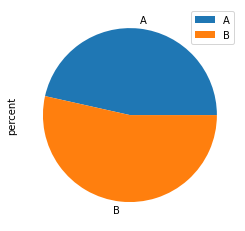

In [69]:
# смотрим доли

# делаем сводную таблицу
a_b_total = orders.pivot_table(index='group', values='revenue', aggfunc='count')
# выводим
display(a_b_total)
# добавляем колонку с долями
a_b_total['percent'] = (a_b_total['revenue'] / a_b_total['revenue'].sum() * 100).round(1)
# смотрим
display(a_b_total)
a_b_total.plot(kind='pie', y='percent')


In [38]:
# проверяем пересечение пользователей по группам
duplicates_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
duplicates_users.columns =['groups', 'group_name']
duplicates_users = duplicates_users.query('groups > 1')
display(duplicates_users)

,groups,group_name
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"
351125977,2,"[B, A]"
393266494,2,"[A, B]"
457167155,2,"[B, A]"
471551937,2,"[A, B]"


In [39]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
# просматриваем
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [40]:
# проверяем наличие явных дубликатов
print('Количество явных дубликатов:', visitors.duplicated().sum())

Количество явных дубликатов: 0


In [41]:
# приведем столбец date к нужному типу
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
# проверим
visitors.info()

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [ ]:
# смотрим доли

# делаем сводную таблицу
a_b_total1 = visitors.pivot_table(index='group', values='visitors', aggfunc='count')
# выводим
display(a_b_total1)
# добавляем колонку с долями
a_b_total1['percent'] = (a_b_total1['visitors'] / a_b_total1['visitors'].sum() * 100).round(1)
# смотрим
display(a_b_total1)
a_b_total1.plot(kind='pie', y='percent')


Первая таблица orders хранит в себе информацию об:
    
    1) идентификаторe заказа (transactionId)
    
    2) идентификаторe пользователя, совершившего заказ (visitorId)
    
    3) датe, когда был совершён заказ (date)
    
    4) выручке заказа (revenue)
    
    5) группе A/B-теста, в которую попал заказ (group)
    
Вторая таблица visitors хранит информацию об:
    
    1) дате (date)
    
    2) группе A/B-теста (group)
    
    3) количестве пользователей в указанную дату в указанной группе A/B-теста (visitors)
    

Перевела столбцы date в необходимый тип для дальнейшей работы.

### Собираем кумулятивные данные

In [42]:
# чтобы построить графики, нужно сначала собрать кумулятивные данные

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max',
         'group' : 'max',
         'transactionId' : 'nunique',
         'visitorId' : 'nunique',
         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date': 'max',
     'group': 'max',
     'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])

# объедияем данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# просматриваем
display(cumulativeData.head(10))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


<a class="anchor" id="22-bullet">

### График выручки по группам

Text(0.5, 1.0, 'График кумулятивной выручки по группам')

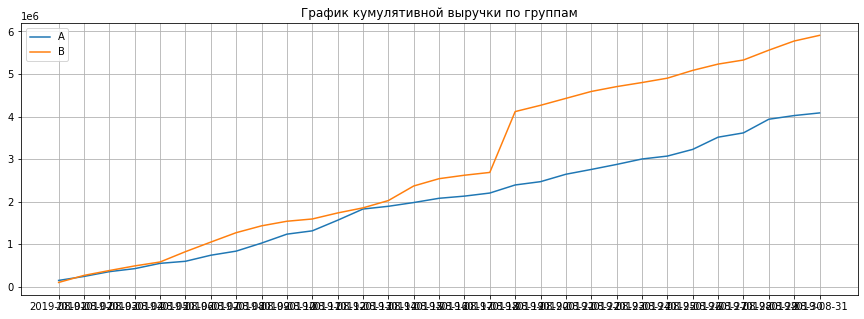

In [43]:
# фрэйм с кумулятивным количеством заказов и выручкой по группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# фрэкм с кумулятивным количеством заказов и выручкой по группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# строим график вырчки А и B групп
plt.figure(figsize = (15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend()
plt.title('График кумулятивной выручки по группам')

Мы видим, что вырчка увеличивается в течение всего теста - это хорошо. Но, в некоторых местах выручка группа В резко растет, чего не скажешь про выручку группы А (тут на первый взгляд всё плавно). Это может говорить о резком увеличении числа заказов или о появлении дорогих заказов в выборке. 

### График кумулятивного среднего чека по группам.

Text(0.5, 1.0, 'График кумулятивного среднего чека по группам')

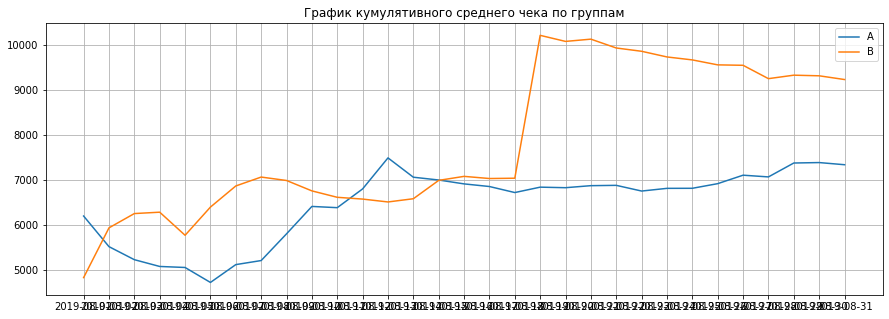

In [44]:
plt.figure(figsize = (15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.legend()
plt.title('График кумулятивного среднего чека по группам')

по группе В можно сказать, что показатели кумулятивного среднего чека по группам после 2019-08-13 становится более менее стабильным. Также наблюдается рост с 2019-08-05 по 2019-08-13 а после фиксируется.

по группе А кумуоятивный средний чек колеблется, но растет. На 2019-08-17 виден резкий скачек, возможно это сигнализирует о крупных заказах. После 2019-08-17 метрика значения падают, но не резко.



### График относительного изменения кумулятивного среднего чека группы B к группе A.

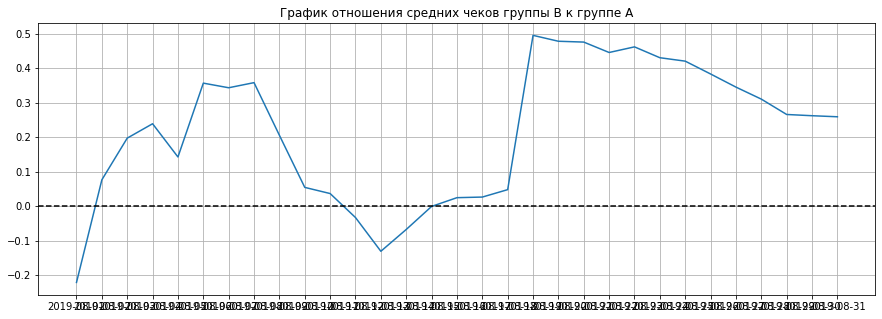

In [45]:
# соединяем данные
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим отношение средких чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (
mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)
plt.grid()
plt.title('График отношения средних чеков группы В к группе А')

# добавляем ось х
plt.axhline(y=0, color='black', linestyle='--')

По графику видно, что группа В вроде справляется со способностью 'покупать'. В начале периода были некие всплески и упадок, но потом виден резкий скачок (возожмно большие заказы) и далее метрика плавно идет вниз. Так или иначе, значения на графике нельзя назвать стабильными, хоть и к концу (после резкого роста) линия достаточно плавно идет вниз.

### График кумулятивной конверсии по группам

(0.0, 31.0, 0.02, 0.04)

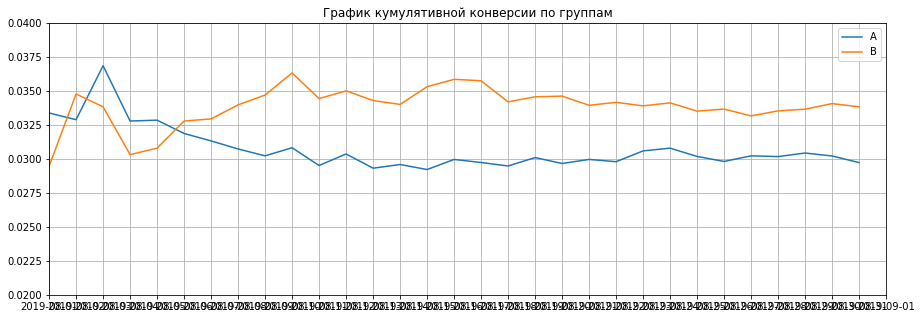

In [46]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отедляем группу А
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
# отделяем группу В
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.legend()
plt.title('График кумулятивной конверсии по группам')

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-09-01', 0.020, 0.040]) 

График относительно симметричен :) 

Были колебания у одних значений, но конверсия группы В явно лидирует. Вначале были небольшие скачки, но потом линия становится более менее стабильна. Конверсия группы А просела и также зафиксировалась.

### График относительного изменения кумулятивной конверсии группы B к группе A.

(0.0, 31.0, -0.15, 0.25)

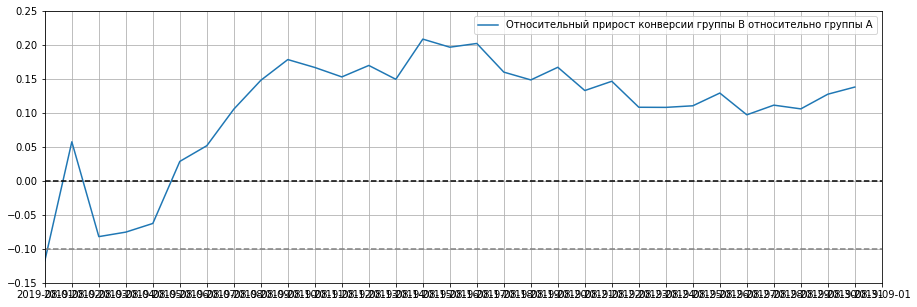

In [47]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.15, 0.25]) 


Совсем не долгое время группа В проигрывала группе А. Спустя достаточное короткое время группа В вырвалась вперед и показывала достаточно хорошие результаты.

Чтобы сделать тот или иной вывод - необходимо для начала проанализиорвать аномалии - возможно он

<a class="anchor" id="23-bullet">

### Точечный график количества заказов по пользователям

In [48]:
# подсчитаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = (orders.groupby(by='visitorId', as_index=False).
                agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))


,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Видно, что есть пользователи, которые совершали 5, 8, 9 и даже 11 заказов. Достаточно много, на мой взгляд.

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

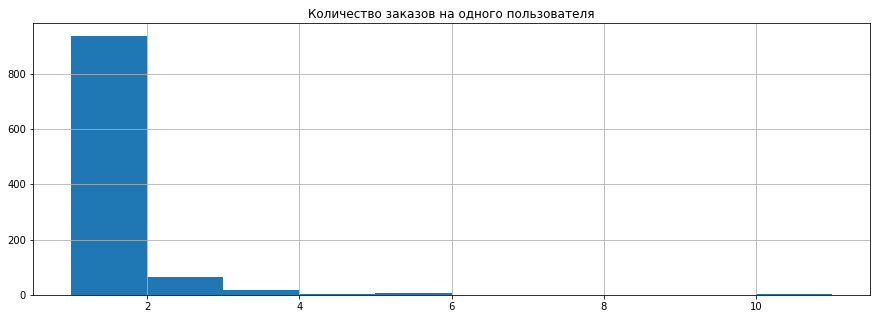

In [49]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Количество заказов на одного пользователя')
plt.hist(ordersByUsers['orders'])

На гситограмме видно, что большиство пользователей совершало заказ 1-2 раза.

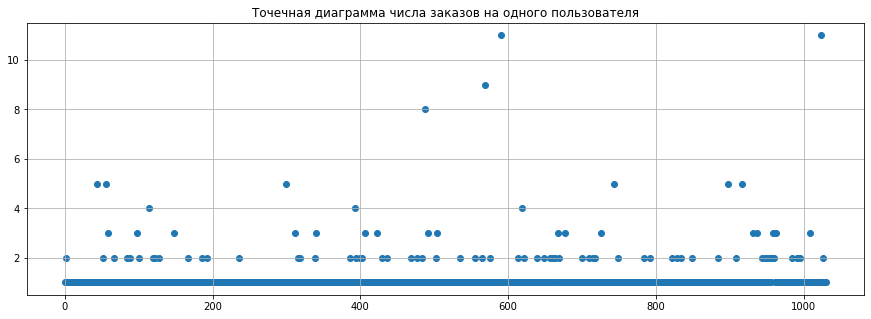

In [50]:
# построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.scatter(x_values, ordersByUsers['orders']) 

В целом, вывод можно подтвердить - много пользователей которые сделали 1-2 заказа.

### Считаем 95-й и 99-й перцентили количества заказов на пользователя

In [51]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print('Выобочные перцентили количества заказов:', np.percentile(ordersByUsers['orders'], [90, 95, 99]))

Выобочные перцентили количества заказов: [1. 2. 4.]


Не более 5% пользователей оформляли болше чем 2 заказа. И более 10% пользователей заказывали больше 1-го раза.

В целом, достаточно разумно выбрать 1-2 заказов на одного пользователя за нижнюю границу числа заказов.

### Точечный график стоимостей заказов

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <BarContainer object of 10 artists>)

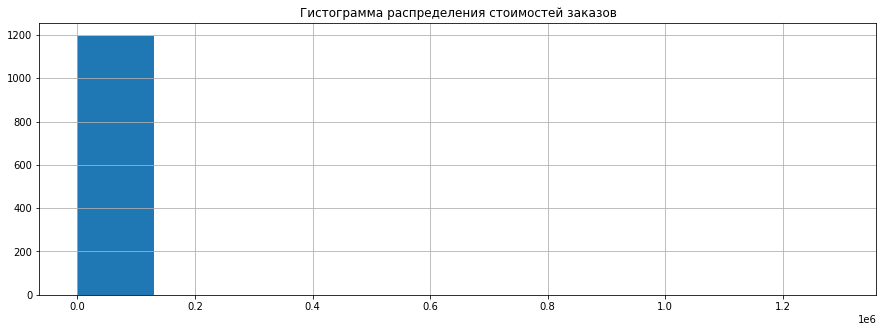

In [52]:
# изучим гистограмму стоимостей заказов
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Гистограмма распределения стоимостей заказов')
plt.hist(orders['revenue'])

Не очень информативно, но видно, что большинство заказов менее 200 000. Однако по гистограмме я не могу сказать про распределение дорогих и более дешевых заказов.

Text(0.5, 1.0, 'Точечный график стоимостей заказов')

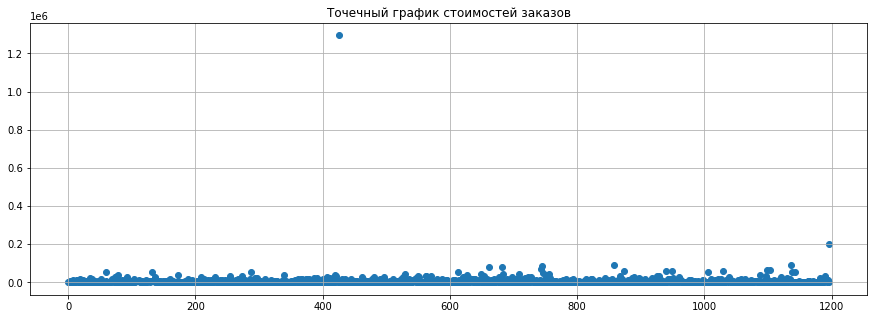

In [53]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')

На точечном графике видно, что есть аномально большие заказы - но их не много (выбросы более 1 200 000 и свыше 200 000)

Больше всего заказов стоимостью от 0 до 100 000 +-, на гистограмме было ощущение, что верхняя граница находится около 160 000 +-
Проверим эту информацию посчитав выборочные перцентили

### Считаем 95-й и 99-й перцентили стоимости заказов

In [54]:
print('Выборочные перцентили стоимостей заказов:', np.percentile(orders['revenue'], [90, 95, 99]))


Выборочные перцентили стоимостей заказов: [18168.  28000.  58233.2]


Так, здесь картина уже совершенно другая..)

Можем сказать, что не более 5% заказов дороже 28 000, и 10% дороже чем 18 168. Также 1% заказов не дороже 58 233.

Думаю, что нормально считать за нижнюю границу заказы не дороже 28 000.




### Считаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [55]:
# соберем данные по заказам и визитам в одну таблицу. Создадим сначала несколько таблиц и затем объединим их
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [56]:
# создаем переменные в которых для пользователей которые заказывали хотя-бы 1 раз укажем число совершенных заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']


ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 



# объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов. 
# тем, что ничего не заказывал - будут соответствовать нули

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


print('alpha =', 0.05)
print("p_value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


alpha = 0.05
p_value = 0.017
0.138


p-value меньше, чем 0.05 - поэтому нулевую гепотезу отвергаем. 

Анализ сырых данных показывает, что в конверсиях между группами есть статестически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%.

Нулевая гипотеза - H0 конверсии между группами по сырым данным равны. Альтернативная гпотеза - H1 конверсии между группами по сырым данным не равны/различны.

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [57]:
print('alpha =', 0.05)
print('p_value = {0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


alpha = 0.05
p_value = 0.729
0.259


p-value значительно больше 0.05. 

Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы В не значительно ниже, чем группы А

Нулевая гипотеза - H0 средние чеки заказа между группами по сырым данным равны. Альтернативная гпотеза - H1 средние чеки заказа между группами по сырым данным не равны/различны.

### Считаем статистическую значимость различий в конверсии между группами по «очищенным» данным 

In [58]:
# примем за аномальчных пользователей тех, кто совершил больше 2-х заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)

abnormalUsers = (
    pd.concat([usersWithManyOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head())
display(abnormalUsers.shape)

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
Name: visitorId, dtype: int64

(20,)

Получилось всего 20 аномальных пользователей

In [59]:
# подгатавливаем выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [60]:
# применим статистический критерий Манна-Уитни к полученным выборкам
print('alpha = 0.05')
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.012
0.170


Результаты по конверсии извенились, но незначительно. Так или иначе сегмент В лучше сегмента А.

Всё еще p-value меньше 0.05

Нулевая гипотеза - H0 конверсии между группами по очищенным данным равны. Альтернативная гпотеза - H1 конверсии между группами по очищенным данным не равны/различны.



### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [61]:
# примем за аномальчные заказы те, которые больше 2-х заказов
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


Получается, что заказов дороже 28000 рублей - 74 штуки.

In [62]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [63]:
print('aplha =', 0.05)
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

aplha = 0.05
p-value = 0.738
-0.020


p-value немного увеличился.

Средний чек группы B значительно ниже среднего чека группы A. Есть статистическая значимость различия среднего чека заказов между группами. После удаления выбросов в данных меньше шума.

Нулевая гипотеза - H0 средние чеки заказа между группами по сырым данным равны. Альтернативная гпотеза - H1 средние чеки заказа между группами по сырым данным не равны/различны.

### Принимаем решение по результатам теста

Из имеющихсяя фактов:

1) Анализ сырых данных показывает, что в конверсиях между группами есть статестически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%. Анализ очищенных данных показывает, что в конверсиях между группами также есть статестически значимые различия.

2) Нет статистически значимого различия по среднему чеку между группами по сырым данным. Но, после удаления аномальных значений статистическая значитмость различия среднего чека между группами появилась.

3) График относительного изменения среднего чека говорит о том, что группа В вроде и справляется со способостью 'покупать', но достаточно не стабильно. показатели идут то вверх, то вниз, то снова резко вверх.

4) График относительного изменения кумулятивной конверсии говорит о том, что группа В лучше группы А, о чем свидетельствуют хорошие и стабильные показатели.

Исходя из выше сказанного могу предположить, что в группе В пользователи стали покупать чаще - они делают в среднем больше покупок. Но, средний чек не вырос, т.е. они делают больше мелких покупок.

Значит, зарабатывать больше бизнес не стал. Нельзя сказать, что для бизнеса есть существенная разница между группами.
Думаю, что нужно остановить тест и зафиксировать отсутствие различий между группами.